<a href="https://colab.research.google.com/github/Alexander-Renteria-DevMl/Data_science_Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Ciencia de Datos Netflix

**Pasos Estructurados Del Data Science && Machine Learning**


1.   Entender el problema
2.   Entender los datos
3.   Determinar un modelo
4.   Realizar EDA
5.   Filtrar datos necesarios
6.   Probar Modelos

**Objetivo**
Predecir si un nuevo titulo sera una Pelicula o una Serie
Para esto usare las caracteristicas

* year = año
* duration = duracion
* type = genero
* raiting = raiting


In [77]:
# Importacion de Libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [78]:
# Importacion de los datos
Netflix_df=pd.read_csv("netflix_titles.csv")
if not Netflix_df.empty:
  print("Datos Cargado correctamente")
else:
  print("No se cargaron los datos , Volver a intentar")



Datos Cargado correctamente


## Inicio del EDA

In [79]:
# Empecemos Con la exploracion basica EDA
Netflix_df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [80]:
# Ver que columnas tienen valores nulos
nulos_total=Netflix_df.isnull().sum()
print(nulos_total)



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [81]:
# Ahora me enfocare en las columnas con valores nulos

columnas = ["country","rating","duration"]

print("----------- REPORTE DE VALORES NULOS Y LIMPIOS -----------\n")

for col in columnas:
    nulos = Netflix_df[col].isnull().sum()
    limpios = Netflix_df.dropna(subset=[col]).isnull().sum()[col]

    print(f"Columna: {col.upper()}")
    print(f"  ➤ Valores nulos: {nulos}")
    print(f"  ➤ Después de limpieza: {limpios} nulos restantes\n")

print("----------- Limpiar todo el Dataset-----------\n")
Netflix_df = Netflix_df.dropna()
print("Reporte del DATASET completo\n")
Netflix_df.isnull().sum()

----------- REPORTE DE VALORES NULOS Y LIMPIOS -----------

Columna: COUNTRY
  ➤ Valores nulos: 831
  ➤ Después de limpieza: 0 nulos restantes

Columna: RATING
  ➤ Valores nulos: 4
  ➤ Después de limpieza: 0 nulos restantes

Columna: DURATION
  ➤ Valores nulos: 3
  ➤ Después de limpieza: 0 nulos restantes

----------- Limpiar todo el Dataset-----------

Reporte del DATASET completo



,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


## Detectar Duplicados && Valores atipicos


In [82]:
# Duplicados
print("Duplicados:", Netflix_df.duplicated().sum())

# Filtrar solo películas
df_movies = Netflix_df[Netflix_df["type"] == "Movie"].copy()
df_movies['duration'] = df_movies['duration'].str.replace("min","").astype(float)

# Calcular IQR
Q1 = df_movies["duration"].quantile(0.25)
Q3 = df_movies["duration"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro de outliers
outliers = df_movies[(df_movies["duration"] < limite_inferior) | (df_movies["duration"] > limite_superior)][['title','duration']]

print("Valores atípicos detectados:")
print(outliers)


Duplicados: 0
Valores atípicos detectados:
                            title  duration
24                          Jeans     166.0
73                   King of Boys     182.0
166   Once Upon a Time in America     229.0
202             Kyaa Kool Hai Hum     165.0
341                      Magnolia     189.0
...                           ...       ...
8629                     Trimurti     173.0
8639                      Tukaram     162.0
8657          Under an Arctic Sky      40.0
8764                   Wyatt Earp     191.0
8770                      Yaadein     171.0

[249 rows x 2 columns]


##  EDA Con Pipeline


===== INFORMACIÓN GENERAL =====
Filas y columnas: (8807, 12)

Tipos de datos:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Primeras 5 filas:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Got

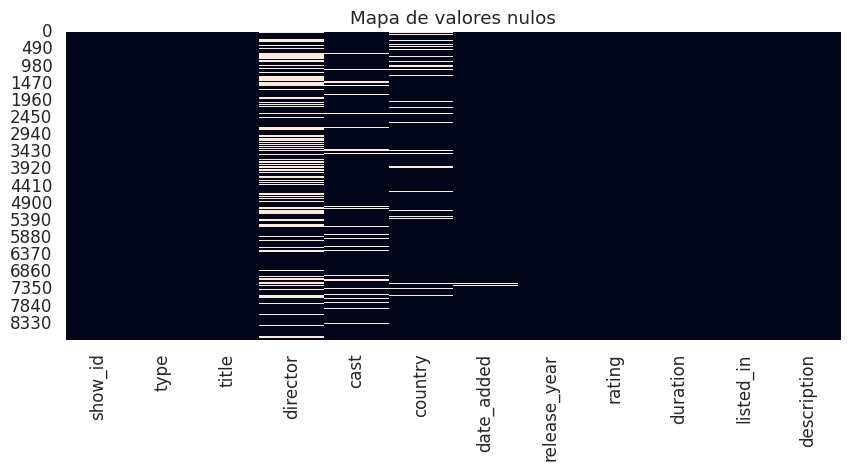

===== ESTADÍSTICAS =====
               count unique  \
show_id         8807   8807   
type            8807      2   
title           8807   8807   
director        6173   4528   
cast            7982   7692   
country         7976    748   
date_added      8797   1767   
release_year  8807.0    NaN   
rating          8803     17   
duration        8804    220   
listed_in       8807    514   
description     8807   8775   

                                                            top  freq  \
show_id                                                   s8807     1   
type                                                      Movie  6131   
title                                                    Zubaan     1   
director                                          Rajiv Chilaka    19   
cast                                         David Attenborough    19   
country                                           United States  2818   
date_added                                      January 1, 2

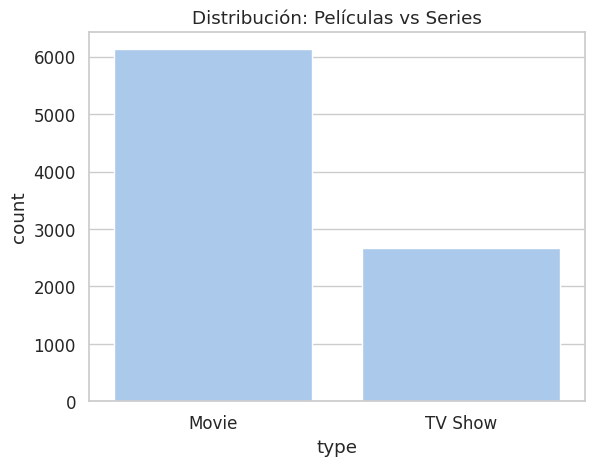


===== OUTLIERS EN 'duration' =====
                          title  duration
22              Avvai Shanmughi     161.0
24                        Jeans     166.0
45       My Heroes Were Cowboys      23.0
71  A StoryBots Space Adventure      13.0
73                 King of Boys     182.0


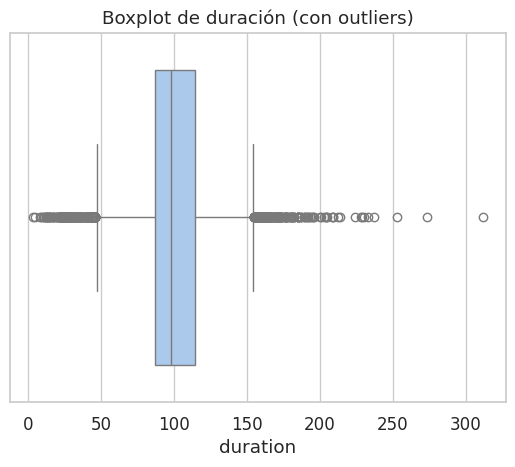

In [85]:

# ================================
# 1. Cargar dataset
# ================================
df = pd.read_csv("netflix_titles.csv")

print("===== INFORMACIÓN GENERAL =====")
print("Filas y columnas:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nPrimeras 5 filas:")
print(df.head(), "\n")

# ================================
# 2. Duplicados
# ================================
duplicados = df.duplicated().sum()
print("===== DUPLICADOS =====")
print(f"Total de filas duplicadas: {duplicados}\n")

# ================================
# 3. Valores nulos
# ================================
print("===== VALORES NULOS =====")
nulos = df.isnull().sum()
print(nulos[nulos > 0])   # solo muestra columnas con nulos

# Visualización de nulos
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores nulos")
plt.show()

# ================================
# 4. Estadísticas básicas
# ================================
print("===== ESTADÍSTICAS =====")
print(df.describe(include='all').transpose())

# ================================
# 5. Variables categóricas
# ================================
print("===== VARIABLES CATEGÓRICAS =====")
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts().head(5))  # top 5 categorías

# Ejemplo gráfico: Películas vs Series
sns.countplot(data=df, x="type")
plt.title("Distribución: Películas vs Series")
plt.show()

# ================================
# 6. Outliers con IQR (ejemplo en 'duration')
# ================================
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace("min","").astype(float)

Q1 = df_movies['duration'].quantile(0.25)
Q3 = df_movies['duration'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df_movies[(df_movies['duration'] < lower) | (df_movies['duration'] > upper)]
print("\n===== OUTLIERS EN 'duration' =====")
print(outliers[['title','duration']].head())

sns.boxplot(x=df_movies['duration'])
plt.title("Boxplot de duración (con outliers)")
plt.show()


#Pipeline mas optimizado

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Duplicados: 0


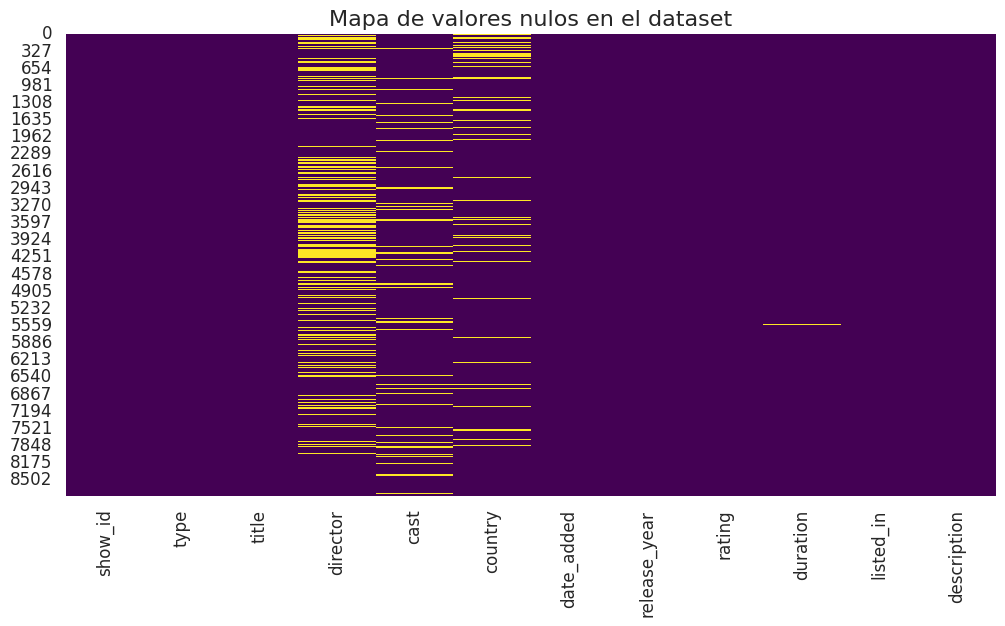


Valores nulos por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


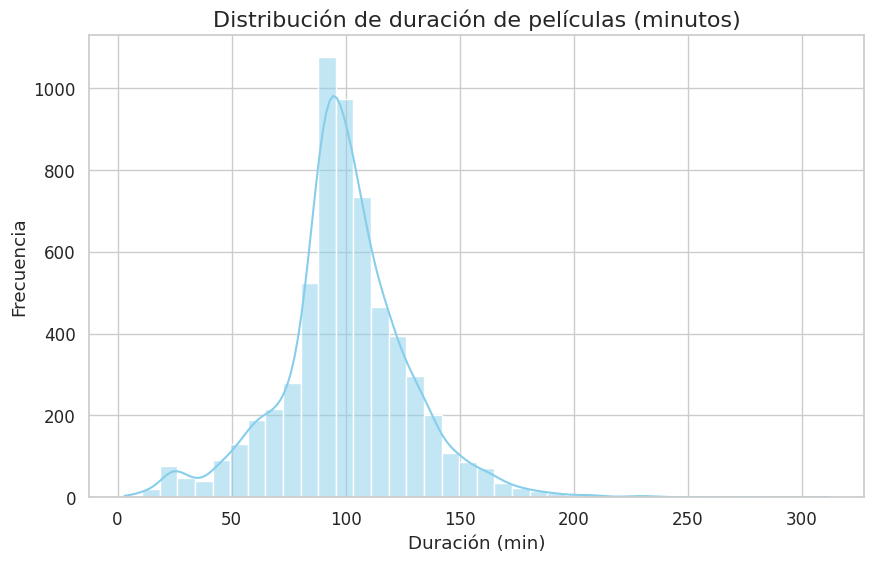

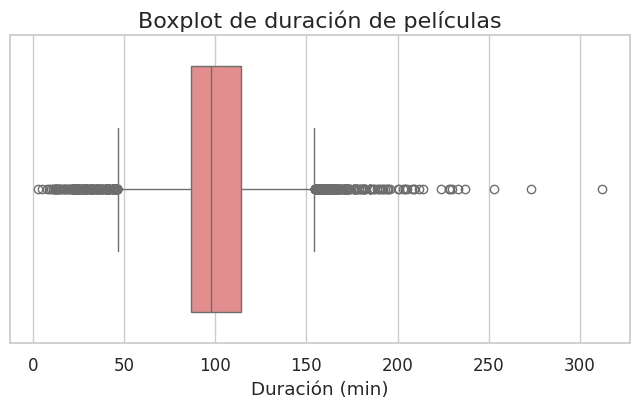


valores atípicos en duración:
                           title  duration
22               Avvai Shanmughi     161.0
24                         Jeans     166.0
45        My Heroes Were Cowboys      23.0
71   A StoryBots Space Adventure      13.0
73                  King of Boys     182.0
166  Once Upon a Time in America     229.0
177         The Guns of Navarone     156.0
202            Kyaa Kool Hai Hum     165.0
341                     Magnolia     189.0
392             Django Unchained     165.0

Límites usados para detectar outliers: (np.float64(46.5), np.float64(154.5))


In [88]:
# Configuración estética
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# --- 1. Cargar datos ---
Netflix_df = pd.read_csv("netflix_titles.csv")

# --- 2. Resumen general ---
print("Información general del dataset:\n")
print(Netflix_df.info())
print("\nDuplicados:", Netflix_df.duplicated().sum())

# --- 3. Valores nulos ---
plt.figure(figsize=(12,6))
sns.heatmap(Netflix_df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos en el dataset", fontsize=16)
plt.show()

print("\nValores nulos por columna:")
print(Netflix_df.isnull().sum())

# --- 4. Análisis de duración de películas ---
df_movies = (
    Netflix_df[Netflix_df["type"] == "Movie"]
    .assign(duration=lambda x: x["duration"].str.replace("min", "", regex=False).astype(float))
    .dropna(subset=["duration"])
)

# Histograma de duración
plt.figure(figsize=(10,6))
sns.histplot(df_movies["duration"], bins=40, kde=True, color="skyblue")
plt.title("Distribución de duración de películas (minutos)", fontsize=16)
plt.xlabel("Duración (min)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df_movies["duration"], color="lightcoral")
plt.title("Boxplot de duración de películas", fontsize=16)
plt.xlabel("Duración (min)")
plt.show()

# --- 5. Detección de outliers con IQR ---
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    mask = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
    return df.loc[mask, ["title", columna]], (limite_inferior, limite_superior)

outliers, limites = detectar_outliers_iqr(df_movies, "duration")

print("\nvalores atípicos en duración:")
print(outliers.head(10))
print(f"\nLímites usados para detectar outliers: {limites}")


#Pipeline completo de Prediccion

In [89]:
# --- Cargar datos ---
df = pd.read_csv("netflix_titles.csv")

# --- Preprocesar duración ---
def limpiar_duracion(valor):
    if pd.isnull(valor):
        return None
    if "min" in valor:
        return float(valor.replace("min", ""))
    if "Season" in valor:
        return float(valor.split()[0])  # toma el número de temporadas
    return None

df["duration_clean"] = df["duration"].apply(limpiar_duracion)

# --- Features y Target ---
X = df[["release_year", "duration_clean", "rating" ]]
y = df["type"]  # target: Movie o TV Show

X = X.dropna()
y = y.loc[X.index]  # aseguramos que target quede alineado
# --- Definir columnas ---
numeric_features = ["release_year", "duration_clean"]
categorical_features = ["rating"]

# --- Preprocesador ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# --- Modelo con pipeline ---
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Entrenar ---
clf.fit(X_train, y_train)


# --- Evaluar ---
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1225
     TV Show       1.00      1.00      1.00       535

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



## PiPeline un poco mas desafiante quitando una caracteristica

In [90]:

# --- Cargar datos ---
df = pd.read_csv("netflix_titles.csv")

# --- Preprocesar duración ---
def limpiar_duracion(valor):
    if pd.isnull(valor):
        return None
    if "min" in valor:
        return float(valor.replace("min", ""))
    if "Season" in valor:
        return float(valor.split()[0])  # toma el número de temporadas
    return None

df["duration_clean"] = df["duration"].apply(limpiar_duracion)

# --- Features y Target ---
X = df[["release_year", "duration_clean", "rating"]]
y = df["type"]  # target: Movie o TV Show

X = X.dropna()
y = y.loc[X.index]  # aseguramos que target quede alineado
# --- Definir columnas ---
numeric_features = ["release_year", "duration_clean"]
categorical_features = ["rating"]

# --- Preprocesador ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# --- Modelo con pipeline ---
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Entrenar ---
clf.fit(X_train, y_train)


# --- Evaluar ---
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1225
     TV Show       1.00      1.00      1.00       535

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



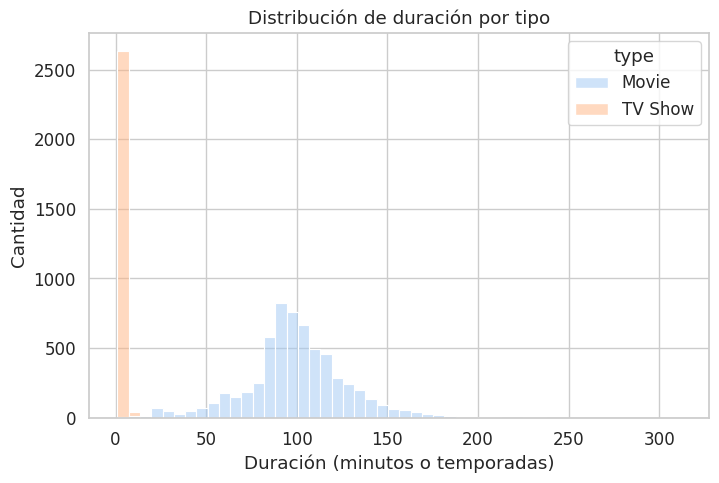

In [92]:
# La respuesta es Muy Obvia , Los datos son muy "faciles"
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="duration_clean", hue="type", bins=50, kde=False)
plt.title("Distribución de duración por tipo")
plt.xlabel("Duración (minutos o temporadas)")
plt.ylabel("Cantidad")
plt.show()


#Como conclusion los datos no son aptos para un machine learning pues sus caracteristicas estan muy claras, si  tiene una duracion de 60 a 150 minutos es una pelicula o documental
# Y si Dura 1 o mas temporadas es una serie